In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.0.dev81+ga8bd4cf3 anndata==0.7.8 umap==0.5.2 numpy==1.21.6 scipy==1.7.3 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [3]:
data = sc.read_h5ad('./data/Tcell_PDL1.h5ad')

In [4]:
np.unique(data.obs['Sub_Cluster'])

array(['t_CD4-CXCL13', 't_CD4_Tcm-LMNA', 't_CD4_Tn-LEF1',
       't_CD4_Treg-FOXP3', 't_CD8-CXCL13', 't_CD8_MAIT-KLRB1',
       't_CD8_Teff-GNLY', 't_CD8_Tem-GZMK', 't_CD8_Trm-ZNF683',
       't_Tact-IFI6', 't_Tact-XIST', 't_Tprf-MKI67'], dtype=object)

In [5]:
cluster = 't_Tact-XIST'

In [6]:
adata = data[data.obs['Sub_Cluster'] == cluster]
adata

View of AnnData object with n_obs × n_vars = 2365 × 27085
    obs: 'CellName', 'ID', 'Sample', 'Patient', 'group', 'Tissue', 'Origin', 'Response', 'Timeline', 'Treatment', 'batch', 'n_genes', 'percent_mito', 'percent_hsp', 'percent_ig', 'percent_rp', 'n_counts', 'leiden', 'Louvain', 'myleiden', 'defcls', 'Global_Cluster', 'Sub_Cluster', 'Global_tSNE_1', 'Global_tSNE_2', 'Global_UMAP_1', 'Global_UMAP_2', 'Sub_tSNE_1', 'Sub_tSNE_2', 'Sub_UMAP_1', 'Sub_UMAP_2'

In [7]:
ann = pd.read_csv('./result/cluster/'+cluster+'_cluster.csv',
                  index_col=0,header=0,sep=',',
                 usecols=['cell','cluster'])

In [8]:
adata.obs = adata.obs.join(ann)

In [9]:
adata.obs

,CellName,ID,Sample,Patient,group,Tissue,Origin,Response,Timeline,Treatment,...,Sub_Cluster,Global_tSNE_1,Global_tSNE_2,Global_UMAP_1,Global_UMAP_2,Sub_tSNE_1,Sub_tSNE_2,Sub_UMAP_1,Sub_UMAP_2,cluster
TACGGGCCAGTAAGCG.Pre_P007_t,TACGGGCCAGTAAGCG.01_DXJ007_T_5,56,Pre_P007_T,P007,1,T,lymph_node,PR,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,16.533729,-12.335765,-0.646387,2.730685,16.533729,-12.335765,-0.646387,2.730685,7
AAACCTGCAGCCAATT.Pre_P012_t,AAACCTGCAGCCAATT.01_HFR012_T_5,65,Pre_P012_T,P012,1,T,lymph_node,PR,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-0.837798,-7.315927,-1.260234,1.765282,-0.837798,-7.315927,-1.260234,1.765282,32
AAACCTGTCACGAAGG.Pre_P012_t,AAACCTGTCACGAAGG.01_HFR012_T_5,65,Pre_P012_T,P012,1,T,lymph_node,PR,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-11.571447,-11.741175,-0.113956,2.700812,-11.571447,-11.741175,-0.113956,2.700812,12
AAAGCAAGTATAGGGC.Pre_P012_t,AAAGCAAGTATAGGGC.01_HFR012_T_5,65,Pre_P012_T,P012,1,T,lymph_node,PR,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-14.492122,2.417904,-0.218168,2.026984,-14.492122,2.417904,-0.218168,2.026984,15
AACCATGAGTTAGGTA.Pre_P012_t,AACCATGAGTTAGGTA.01_HFR012_T_5,65,Pre_P012_T,P012,1,T,lymph_node,PR,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-10.405621,0.731831,-1.533022,1.782779,-10.405621,0.731831,-1.533022,1.782779,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGCTGGTCTCCGGTT.Pre_P004_t,TGGCTGGTCTCCGGTT.01_JLR004_T_5,48,Pre_P004_T,P004,1,T,chest_wall,SD,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-10.433956,-2.848505,-0.860229,1.436544,-10.433956,-2.848505,-0.860229,1.436544,14
TGGTTCCAGTACGACG.Pre_P004_t,TGGTTCCAGTACGACG.01_JLR004_T_5,48,Pre_P004_T,P004,1,T,chest_wall,SD,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-12.396425,-3.562701,-0.837865,1.921507,-12.396425,-3.562701,-0.837865,1.921507,14
TTCTACACATATGCTG.Pre_P004_t,TTCTACACATATGCTG.01_JLR004_T_5,48,Pre_P004_T,P004,1,T,chest_wall,SD,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,-9.749971,-3.310218,-1.467162,1.425084,-9.749971,-3.310218,-1.467162,1.425084,14
TTGGCAAGTCAAACTC.Pre_P004_t,TTGGCAAGTCAAACTC.01_JLR004_T_5,48,Pre_P004_T,P004,1,T,chest_wall,SD,Pre_treatment,anti-PDL1+Chemo,...,t_Tact-XIST,15.976434,-12.336714,0.447322,-0.404683,15.976434,-12.336714,0.447322,-0.404683,30


In [10]:
sc.pp.normalize_total(adata,target_sum=1e6)

normalizing counts per cell
    finished (0:00:00)


In [11]:
sc.pp.log1p(adata)

In [12]:
adata.obs['cluster'] = adata.obs['cluster'].astype('category')

In [13]:
zhang = pd.read_csv('./data/exhausted geneset.csv')

In [14]:
zhang

,Gene Symbol
0,HAVCR2
1,CXCL13
2,CCL3
3,SIRPG
4,IFNG
...,...
83,TNIP3
84,CD7
85,PSMD4
86,ATP6V1C2


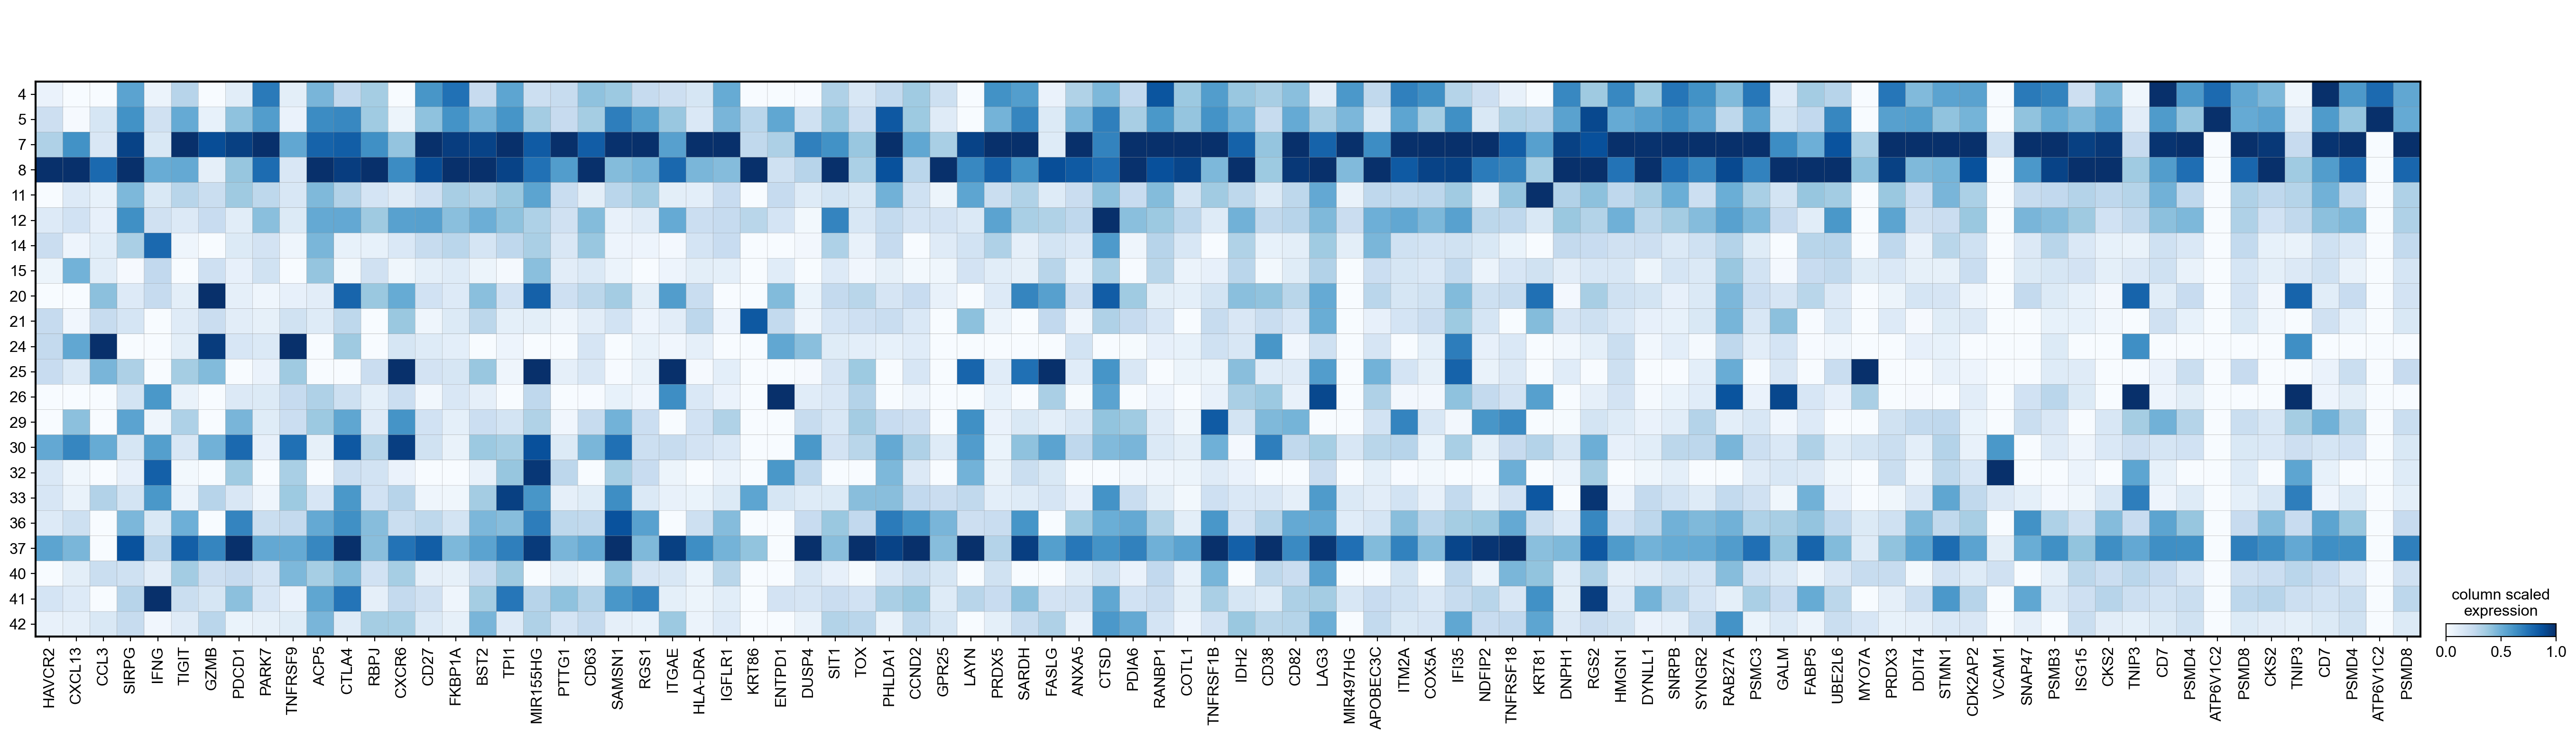

In [15]:
sc.pl.matrixplot(adata, zhang['Gene Symbol'], cmap='Blues',groupby='cluster', standard_scale='var',
                 colorbar_title='column scaled\nexpression')


In [16]:
adata.obs['cluster'] = adata.obs['cluster'].replace((33,41,26,42,24,20,25),0)

In [17]:
# 设置case组和control组
for i in adata.obs_names:
    if adata.obs.loc[i,'cluster']==0:
        adata.obs.loc[i,'divide']='ICI-opposite'
    else:
        adata.obs.loc[i,'divide']='ICI-support'

/Users/liupeiwen/python/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'divide' as categorical


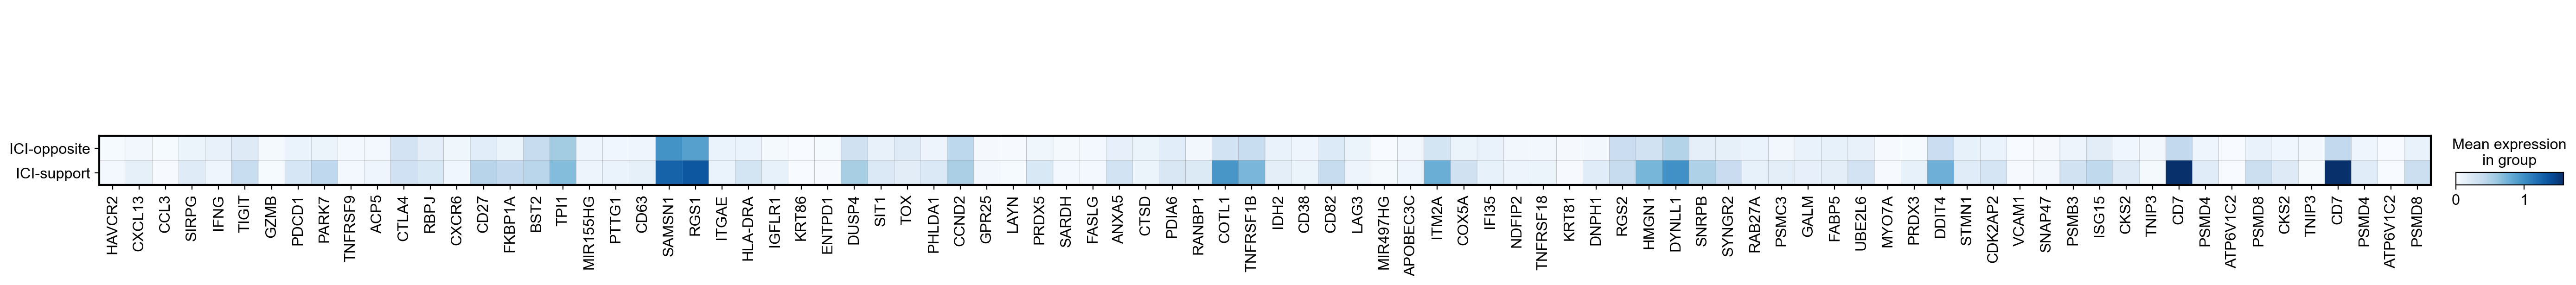

In [18]:
sc.pl.matrixplot(adata, zhang['Gene Symbol'], cmap='Blues',groupby='divide')
